In [1]:
!pip install kaggle
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle
!kaggle competitions download -c ashrae-energy-prediction

 87% 104M/120M [00:01<00:00, 63.9MB/s] 
100% 120M/120M [00:01<00:00, 103MB/s] 
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 186MB/s]
 97% 86.0M/88.4M [00:00<00:00, 285MB/s]
100% 88.4M/88.4M [00:00<00:00, 293MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 172MB/s]
 91% 151M/167M [00:00<00:00, 224MB/s]
100% 167M/167M [00:00<00:00, 244MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 39.0MB/s]


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


### Train Data

In [0]:
df_train=pd.read_csv('train.csv.zip')
df_train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [0]:
df_train.meter.value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

In [0]:
df_train.meter_reading.isnull().sum()

0

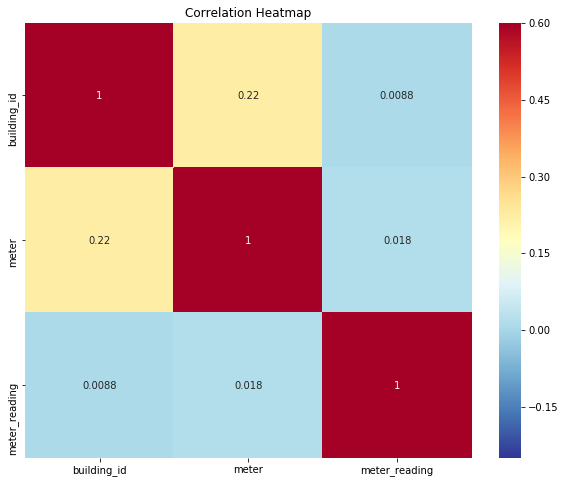

In [0]:
corrs = df_train.corr()
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### *Test* Data

In [4]:
df_test=pd.read_csv('test.csv.zip')
df_test

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


###Building metadata

In [5]:
df_build= pd.read_csv('building_metadata.csv')
df_build

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [0]:
df_build.dtypes

site_id          int64
building_id      int64
primary_use     object
square_feet      int64
year_built     float64
floor_count    float64
dtype: object

In [0]:
df_build.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [0]:
df_build.floor_count.isna().mean()
# to drop

0.7550034506556246

In [0]:
df_build.year_built.isna().mean()
# to drop

In [0]:
df_build.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [0]:
df_build.loc[df_build.primary_use == 'Healthcare'  , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Parking' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Warehouse/storage' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Manufacturing/industrial' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Retail' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Services' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Technology/science', 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Food sales and service' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Utility' , 'primary_use'] = "Other"
df_build.loc[df_build.primary_use == 'Religious worship' , 'primary_use'] = "Other"

In [0]:
df_build.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                            134
Name: primary_use, dtype: int64

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_build['primary_use'])
df_build['primary_use']=le.transform(df_build['primary_use'])
df_build.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,7432,2008.0,NaN
1,0,1,0,2720,2004.0,NaN
2,0,2,0,5376,1991.0,NaN
3,0,3,0,23685,2002.0,NaN
4,0,4,0,116607,1975.0,NaN


In [0]:
df_build=df_build.drop(columns=['floor_count','year_built'])

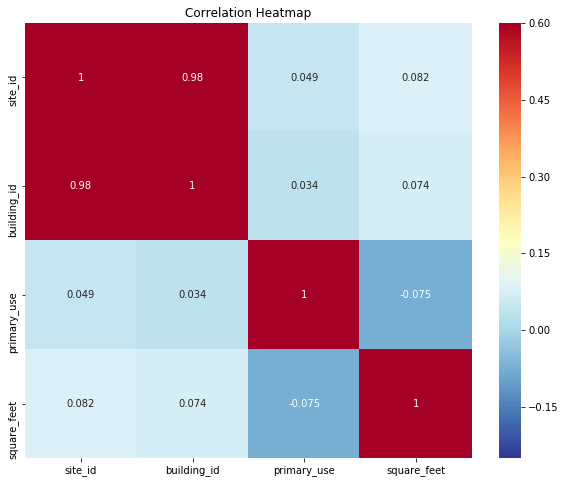

In [0]:
corrs = df_build.corr()
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### Weather train data

In [0]:
df_wtrain= pd.read_csv('weather_train.csv.zip')
df_wtrain

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [0]:
df_wtrain.describe()
# cloud_coverage and precip_depth_1_hr to drop

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


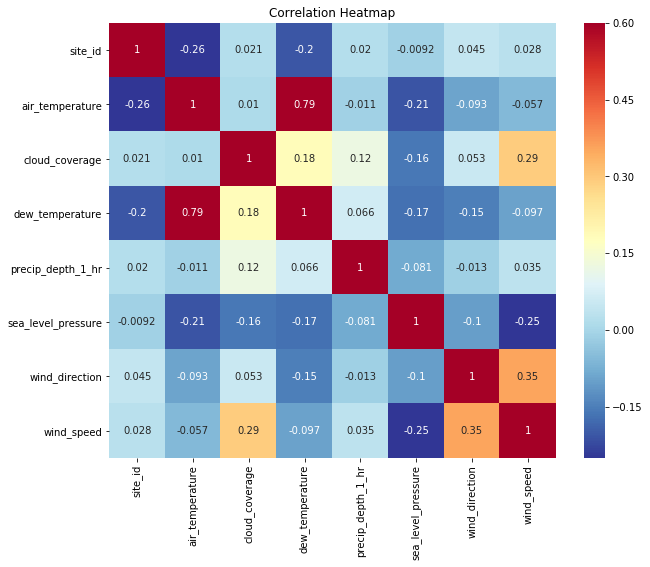

In [0]:
corrs = df_wtrain.corr()
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [0]:
df_wtrain=df_wtrain.drop(columns=['cloud_coverage','precip_depth_1_hr','dew_temperature'])
df_wtrain.head()

,site_id,timestamp,air_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,1020.0,250.0,2.6


In [0]:
# fill missing values
df_wtrain.air_temperature.fillna(df_wtrain.air_temperature.mean(), inplace=True)
df_wtrain.sea_level_pressure.fillna(df_wtrain.sea_level_pressure.mean(), inplace=True)
df_wtrain.wind_direction.fillna(df_wtrain.wind_direction.mean(), inplace=True)
df_wtrain.wind_speed.fillna(df_wtrain.wind_direction.mean(), inplace=True)
df_wtrain.describe()

,site_id,air_temperature,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139773.000000,139773.000000,139773.000000,139773.000000
mean,7.478977,14.418106,1016.158038,180.526632,3.945421
std,4.604744,10.624504,7.334160,108.994339,8.567955
min,0.000000,-28.900000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,1012.200000,90.000000,2.100000
50%,7.000000,15.000000,1016.158038,180.526632,3.100000
75%,11.000000,22.200000,1020.400000,270.000000,5.000000
max,15.000000,47.200000,1045.500000,360.000000,180.526632


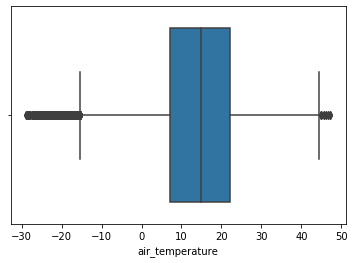

In [0]:
sns.boxplot(x=df_wtrain['air_temperature'])

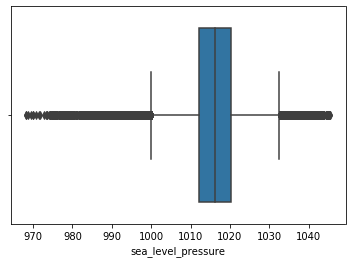

In [0]:
sns.boxplot(x=df_wtrain['sea_level_pressure'])

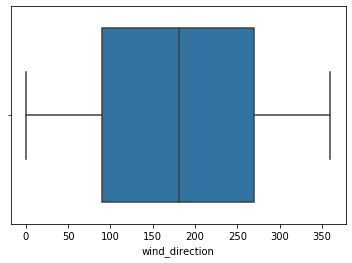

In [0]:
sns.boxplot(x=df_wtrain['wind_direction'])

### Weather Test Data

In [9]:
df_wtest= pd.read_csv('weather_test.csv.zip')
df_wtest

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...
277238,15,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
277239,15,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
277240,15,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
277241,15,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1


In [10]:
df_wtest=df_wtest.drop(columns=['cloud_coverage','precip_depth_1_hr','dew_temperature'])
df_wtest.head()

,site_id,timestamp,air_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,1022.3,130.0,2.6


In [0]:
df_wtest.describe()

,site_id,air_temperature,sea_level_pressure,wind_direction,wind_speed
count,277243.000000,277139.000000,255978.000000,264873.000000,276783.000000
mean,7.484654,14.276863,1016.195762,180.426023,3.548873
std,4.616959,10.741605,7.940392,110.456872,2.317184
min,0.000000,-28.100000,972.000000,0.000000,0.000000
25%,3.000000,7.200000,1011.600000,80.000000,2.100000
50%,7.000000,15.000000,1016.300000,190.000000,3.100000
75%,12.000000,22.200000,1020.800000,280.000000,4.600000
max,15.000000,48.300000,1050.100000,360.000000,24.200000


### join Training data 

In [0]:
train_data =  pd.merge(df_train, df_build, on=['building_id'],sort=False)
train_data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet
0,0,0,2016-01-01 00:00:00,0.00,0,0,7432
1,0,0,2016-01-01 01:00:00,0.00,0,0,7432
2,0,0,2016-01-01 02:00:00,0.00,0,0,7432
3,0,0,2016-01-01 03:00:00,0.00,0,0,7432
4,0,0,2016-01-01 04:00:00,0.00,0,0,7432
...,...,...,...,...,...,...,...
20216095,403,0,2016-12-31 19:00:00,43.66,3,0,49500
20216096,403,0,2016-12-31 20:00:00,43.64,3,0,49500
20216097,403,0,2016-12-31 21:00:00,43.89,3,0,49500
20216098,403,0,2016-12-31 22:00:00,44.37,3,0,49500


In [0]:
train_data.building_id.max()

1448

In [0]:
train_data =  pd.merge(train_data, df_wtrain, on=['site_id','timestamp'],sort=False)
train_data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0000,0,0,7432,25.0,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0000,0,0,2720,25.0,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0000,0,0,5376,25.0,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0000,0,0,23685,25.0,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0000,0,0,116607,25.0,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,2016-03-24 12:00:00,15.3753,15,2,21168,1.7,1016.8,0.0,0.0
20125601,1400,1,2016-03-24 13:00:00,25.0848,15,2,21168,2.8,1016.6,320.0,1.5
20125602,1400,1,2016-03-24 14:00:00,32.3439,15,2,21168,5.6,1015.2,110.0,2.1
20125603,1400,1,2016-03-24 15:00:00,24.2214,15,2,21168,11.1,1013.9,150.0,5.1


In [0]:
train_data['timestamp']=pd.to_datetime(train_data['timestamp'])
train_data['year']=train_data.timestamp.apply(lambda x: x.year)
train_data['month']=train_data.timestamp.apply(lambda x: x.month)

In [0]:
train_data['day']=train_data.timestamp.apply(lambda x: x.day)
train_data['hour']=train_data.timestamp.apply(lambda x: x.hour)
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour
0,0,0,2016-01-01,0.0,0,0,7432,25.0,1019.7,0.0,0.0,2016,1,1,0
1,1,0,2016-01-01,0.0,0,0,2720,25.0,1019.7,0.0,0.0,2016,1,1,0
2,2,0,2016-01-01,0.0,0,0,5376,25.0,1019.7,0.0,0.0,2016,1,1,0
3,3,0,2016-01-01,0.0,0,0,23685,25.0,1019.7,0.0,0.0,2016,1,1,0
4,4,0,2016-01-01,0.0,0,0,116607,25.0,1019.7,0.0,0.0,2016,1,1,0


In [0]:
train_data.month.max()

12

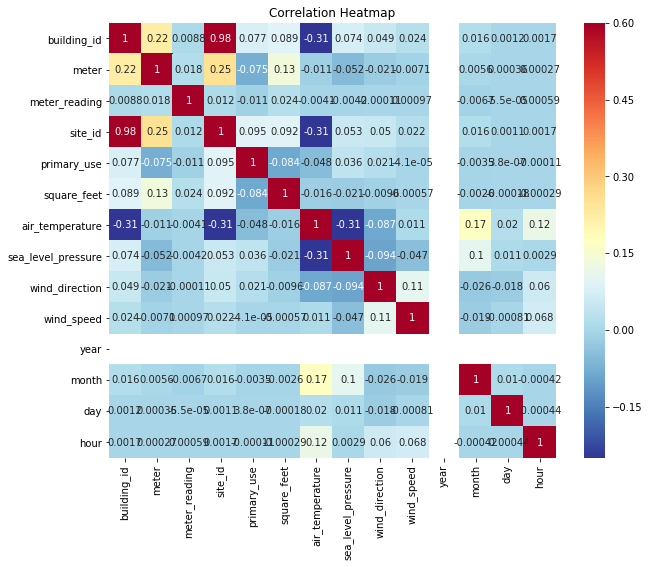

In [0]:
corrs = train_data.corr()
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [0]:
train_data=train_data.drop(columns=["timestamp","site_id"])
train_data.head()

,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour
0,0,0,0.0,0,7432,25.0,1019.7,0.0,0.0,2016,1,1,0
1,1,0,0.0,0,2720,25.0,1019.7,0.0,0.0,2016,1,1,0
2,2,0,0.0,0,5376,25.0,1019.7,0.0,0.0,2016,1,1,0
3,3,0,0.0,0,23685,25.0,1019.7,0.0,0.0,2016,1,1,0
4,4,0,0.0,0,116607,25.0,1019.7,0.0,0.0,2016,1,1,0


### join test data

In [11]:
test_data =  pd.merge(df_test, df_build, on=['building_id'],sort=True)
test_data

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet
0,0,0,0,2017-01-01 00:00:00,0,0,7432
1,129,0,0,2017-01-01 01:00:00,0,0,7432
2,258,0,0,2017-01-01 02:00:00,0,0,7432
3,387,0,0,2017-01-01 03:00:00,0,0,7432
4,516,0,0,2017-01-01 04:00:00,0,0,7432
...,...,...,...,...,...,...,...
41697595,41692949,1448,0,2018-11-14 10:00:00,15,3,92271
41697596,41693199,1448,0,2018-11-14 11:00:00,15,3,92271
41697597,41697099,1448,0,2018-05-09 05:00:00,15,3,92271
41697598,41697349,1448,0,2018-05-09 06:00:00,15,3,92271


In [12]:
test_data =  pd.merge(test_data, df_wtest, on=['site_id','timestamp'],sort=False)
test_data

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,0,7432,17.8,1021.4,100.0,3.6
1,1,1,0,2017-01-01 00:00:00,0,0,2720,17.8,1021.4,100.0,3.6
2,2,2,0,2017-01-01 00:00:00,0,0,5376,17.8,1021.4,100.0,3.6
3,3,3,0,2017-01-01 00:00:00,0,0,23685,17.8,1021.4,100.0,3.6
4,4,4,0,2017-01-01 00:00:00,0,0,116607,17.8,1021.4,100.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...
41498566,41498557,1444,0,2018-12-31 23:00:00,15,1,19619,3.3,1014.7,140.0,5.1
41498567,41498558,1445,0,2018-12-31 23:00:00,15,0,4298,3.3,1014.7,140.0,5.1
41498568,41498559,1446,0,2018-12-31 23:00:00,15,1,11265,3.3,1014.7,140.0,5.1
41498569,41498560,1447,0,2018-12-31 23:00:00,15,2,29775,3.3,1014.7,140.0,5.1


In [13]:
test_data=test_data.sort_values(["row_id"]).reset_index(drop=True)
test_data

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,0,7432,17.8,1021.4,100.0,3.6
1,1,1,0,2017-01-01 00:00:00,0,0,2720,17.8,1021.4,100.0,3.6
2,2,2,0,2017-01-01 00:00:00,0,0,5376,17.8,1021.4,100.0,3.6
3,3,3,0,2017-01-01 00:00:00,0,0,23685,17.8,1021.4,100.0,3.6
4,4,4,0,2017-01-01 00:00:00,0,0,116607,17.8,1021.4,100.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...
41498566,41498566,1369,2,2018-12-31 23:00:00,15,1,53194,3.3,1014.7,140.0,5.1
41498567,41498567,1402,0,2018-12-31 23:00:00,15,2,133594,3.3,1014.7,140.0,5.1
41498568,41498568,1417,2,2018-12-31 23:00:00,15,2,40451,3.3,1014.7,140.0,5.1
41498569,41498569,1431,2,2018-12-31 23:00:00,15,5,111360,3.3,1014.7,140.0,5.1


In [0]:
test_data['timestamp']=pd.to_datetime(test_data['timestamp'])
test_data['year']=test_data.timestamp.apply(lambda x: x.year)


In [0]:
test_data['month']=test_data.timestamp.apply(lambda x: x.month)

In [0]:
test_data['day']=test_data.timestamp.apply(lambda x: x.day)

In [16]:
test_data['hour']=test_data.timestamp.apply(lambda x: x.hour)
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,hour
0,0,0,0,2017-01-01,0,0,7432,17.8,1021.4,100.0,3.6,2017,1,0
1,1,1,0,2017-01-01,0,0,2720,17.8,1021.4,100.0,3.6,2017,1,0
2,2,2,0,2017-01-01,0,0,5376,17.8,1021.4,100.0,3.6,2017,1,0
3,3,3,0,2017-01-01,0,0,23685,17.8,1021.4,100.0,3.6,2017,1,0
4,4,4,0,2017-01-01,0,0,116607,17.8,1021.4,100.0,3.6,2017,1,0


In [18]:
test_data=test_data.drop(columns=["timestamp","site_id","row_id"])
test_data.head()

,building_id,meter,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,hour,day
0,0,0,0,7432,17.8,1021.4,100.0,3.6,2017,1,0,1
1,1,0,0,2720,17.8,1021.4,100.0,3.6,2017,1,0,1
2,2,0,0,5376,17.8,1021.4,100.0,3.6,2017,1,0,1
3,3,0,0,23685,17.8,1021.4,100.0,3.6,2017,1,0,1
4,4,0,0,116607,17.8,1021.4,100.0,3.6,2017,1,0,1


In [0]:
test_data.to_csv('test_data.csv')

### Split train test data

In [0]:
from sklearn.model_selection import train_test_split
X=train_data.drop(columns=['meter_reading'])
#X = X.values.reshape(X.shape[0],1,X.shape[-1]) #for LSTM
n_input = X.shape[1] 
X = X.values.reshape((X.shape[0], n_input))
y=train_data[['meter_reading']]
y=np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [0]:
y

,meter_reading
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
20125600,2.795774
20125601,3.261353
20125602,3.506875
20125603,3.227693


In [0]:
X_train.shape

(18113044, 1, 12)

### Modeling

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten, BatchNormalization


# create the  network
model = Sequential()
#model.add(LSTM(512, activation='relu',  input_shape=(1, X_train.shape[-1]), return_sequences=True))
model.add(Dense(512, activation='relu',   input_dim=n_input))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               6656      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

In [0]:
# fit the network
model.fit(X_train, y_train,  batch_size = 8132, epochs = 60, verbose = 1, validation_data=(X_test, y_test))


Train on 18113044 samples, validate on 2012561 samples
Epoch 1/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2211 - val_loss: 0.3598
Epoch 2/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2207 - val_loss: 0.3445
Epoch 3/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2207 - val_loss: 0.3585
Epoch 4/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2203 - val_loss: 0.3599
Epoch 5/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2194 - val_loss: 0.3225
Epoch 6/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2194 - val_loss: 0.4051
Epoch 7/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2192 - val_loss: 0.3788
Epoch 8/60
18113044/18113044 [==============================] - 44s 2us/step - loss: 0.2187 - val_loss: 0.3716
Epoch 9/60
18113044/18113044 [===========================

In [0]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


### Prediction

In [0]:
test_data=pd.read_csv('test_data.csv', index=False)
test_data

,Unnamed: 0,building_id,meter,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour
0,0,0,0,0,7432,17.8,1021.4,100.0,3.6,2017,1,1,0
1,1,1,0,0,2720,17.8,1021.4,100.0,3.6,2017,1,1,0
2,2,2,0,0,5376,17.8,1021.4,100.0,3.6,2017,1,1,0
3,3,3,0,0,23685,17.8,1021.4,100.0,3.6,2017,1,1,0
4,4,4,0,0,116607,17.8,1021.4,100.0,3.6,2017,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41498566,41498566,1369,2,1,53194,3.3,1014.7,140.0,5.1,2018,12,31,23
41498567,41498567,1402,0,2,133594,3.3,1014.7,140.0,5.1,2018,12,31,23
41498568,41498568,1417,2,2,40451,3.3,1014.7,140.0,5.1,2018,12,31,23
41498569,41498569,1431,2,5,111360,3.3,1014.7,140.0,5.1,2018,12,31,23


In [0]:
import pickle
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
test_data = test_data.values.reshape((test_data.shape[0], test_data.shape[1] ))

In [0]:
testPredict = model.predict(test_data)


In [0]:
testPredict=np.expm1(testPredict)

In [0]:
testPredict=pd.DataFrame(testPredict)
testPredict

,0
0,54.911461
1,10.829567
2,143.113281
3,72.832169
4,562.985291
...,...
41498566,891.838684
41498567,107.156158
41498568,89.281929
41498569,735.886719


In [0]:
testPredict.to_csv('submission-file.csv',header=None)

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions submit -c ashrae-energy-prediction -f submission-file.csv -m "My submission"

100% 725M/725M [00:26<00:00, 28.7MB/s]
Successfully submitted to ASHRAE - Great Energy Predictor III